In [ ]:
# Libraries:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("price_data.csv")

In [ ]:
data.head()

,date,avg_monthly_price
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               249 non-null    object
 1   avg_monthly_price  249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
data.describe()

,avg_monthly_price
count,249.000000
mean,7918.891566
std,2804.992684
min,3500.000000
25%,6123.000000
50%,7250.000000
75%,9783.000000
max,16163.000000


In [ ]:
# checking if null Values Present

In [ ]:
data.isnull().sum()

,0
date,0
avg_monthly_price,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# Visualization over Date

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month
Total_years = data['year'].unique()
Total_months = data['month'].unique()

In [ ]:
data.head()

,date,avg_monthly_price,year,month
0,2005-01-01,5500,2005,1
1,2005-02-01,5476,2005,2
2,2005-03-01,5466,2005,3
3,2005-04-01,5487,2005,4
4,2005-05-01,5876,2005,5


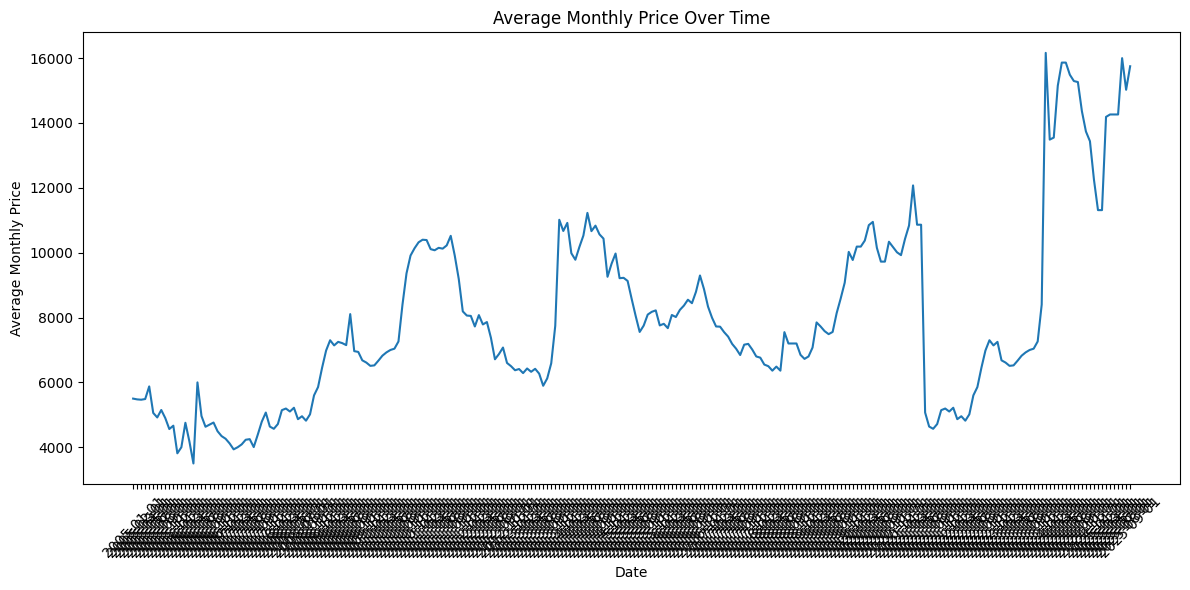

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['avg_monthly_price'])
plt.title('Average Monthly Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Monthly Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("Total_months: ",Total_months)
print("Total_years:",Total_years)

Total_months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Total_years: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2024 2025]


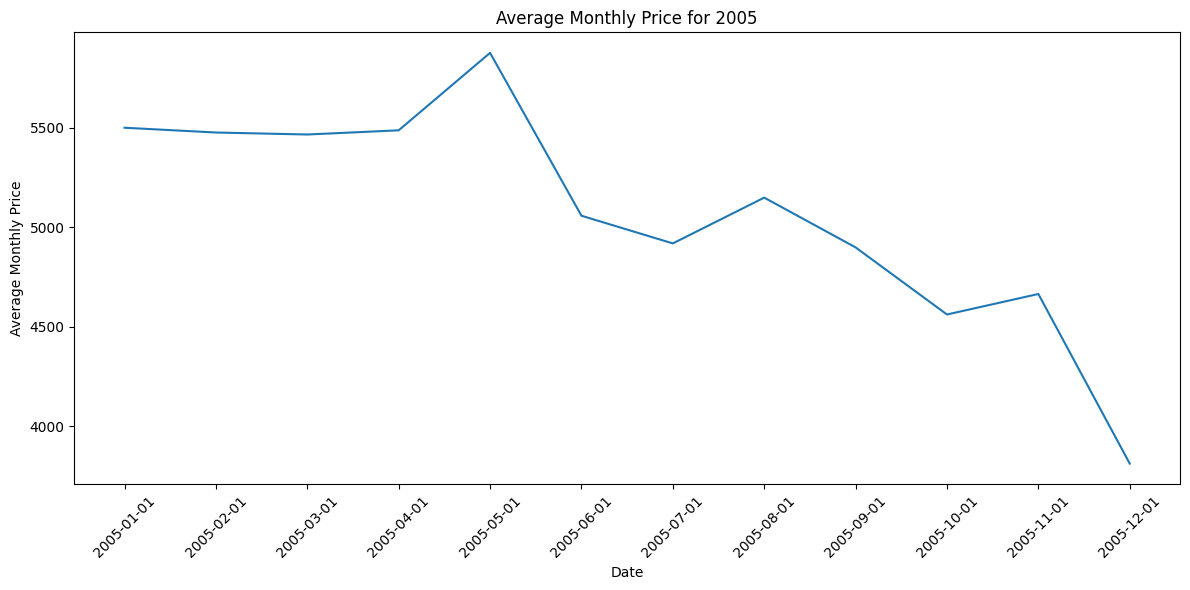

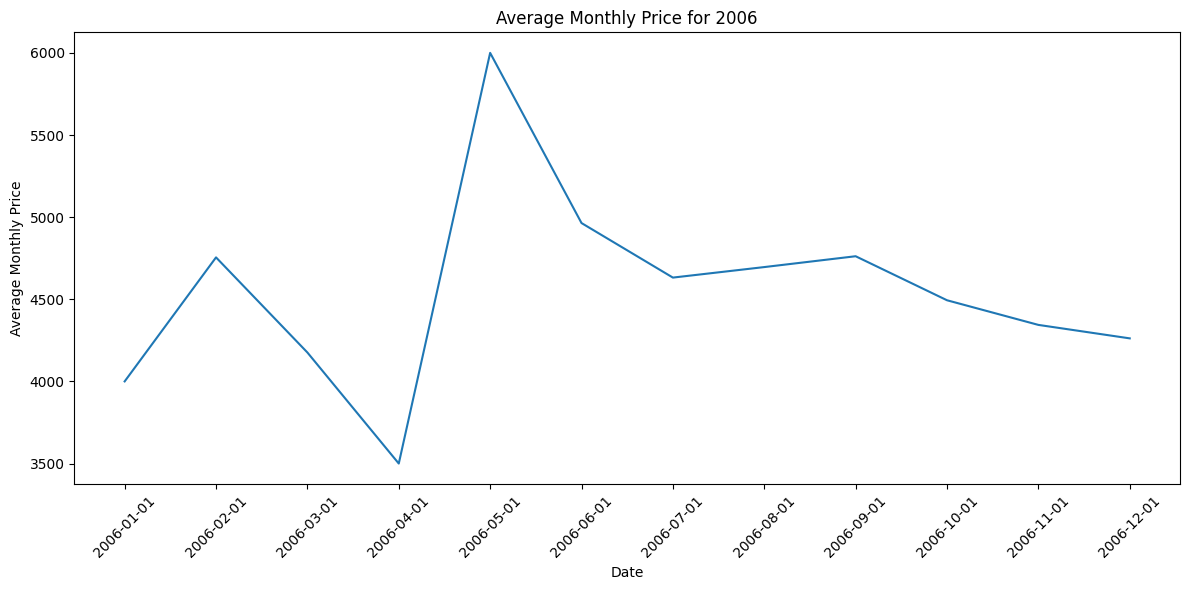

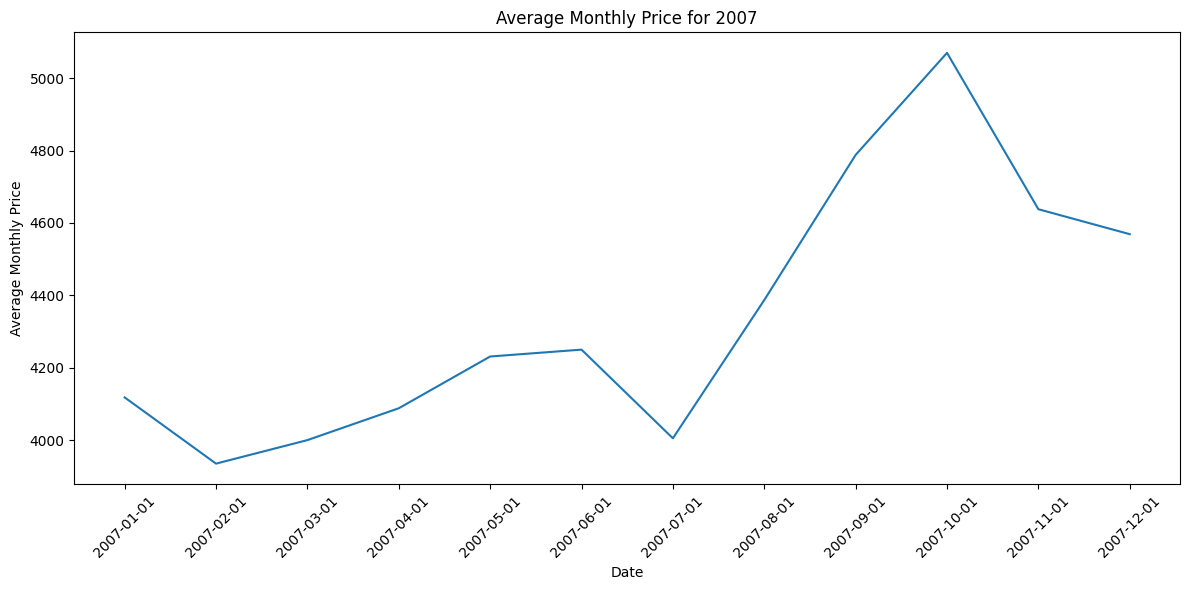

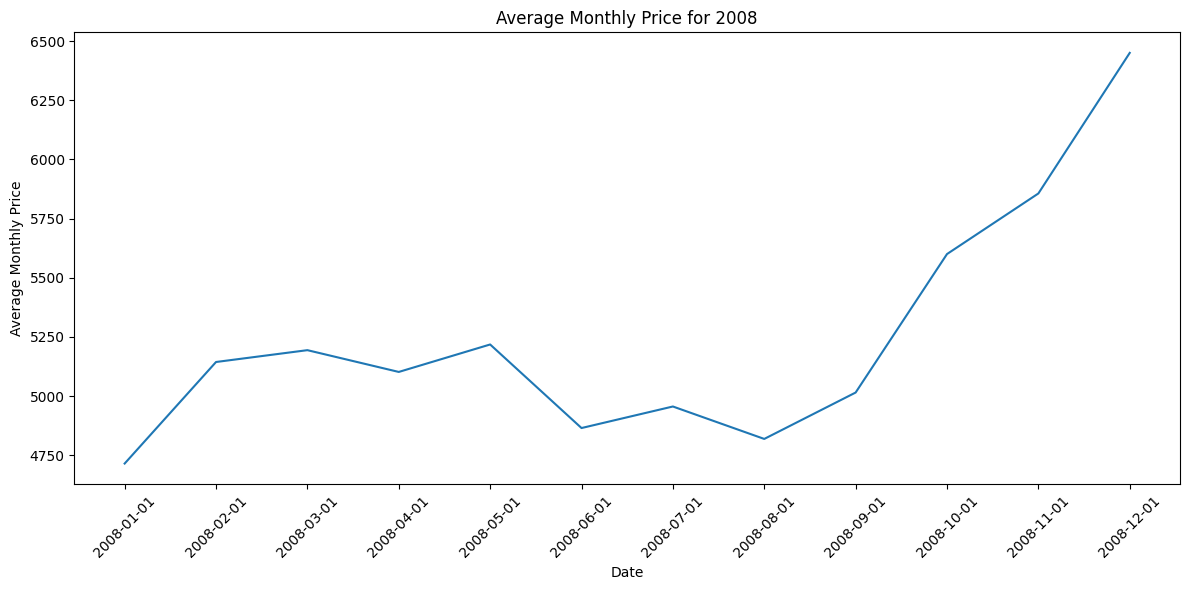

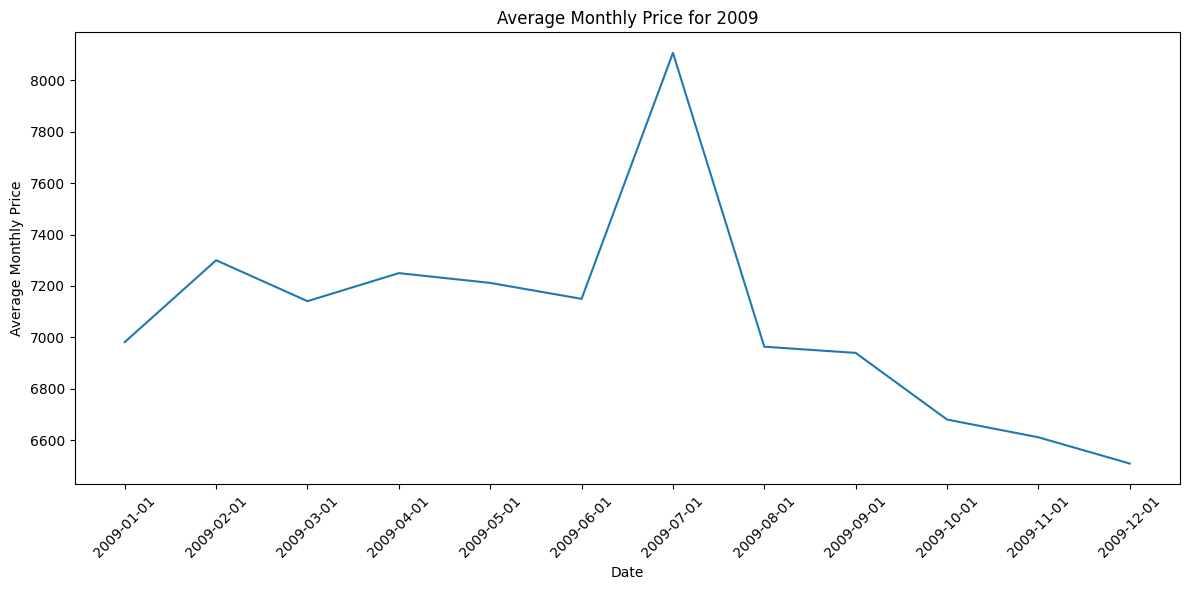

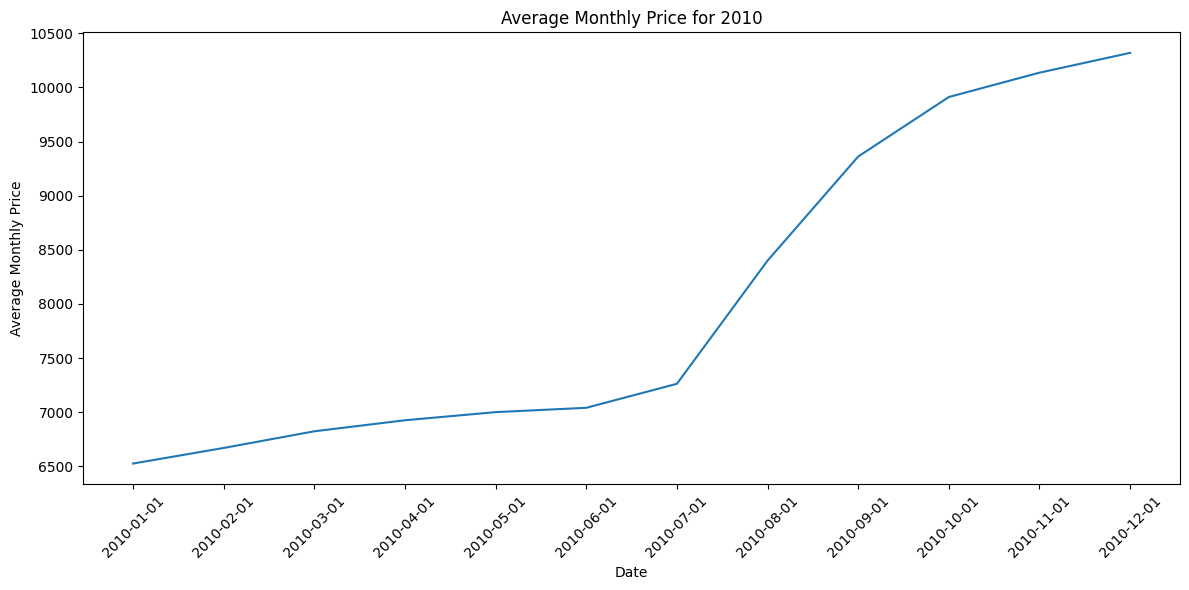

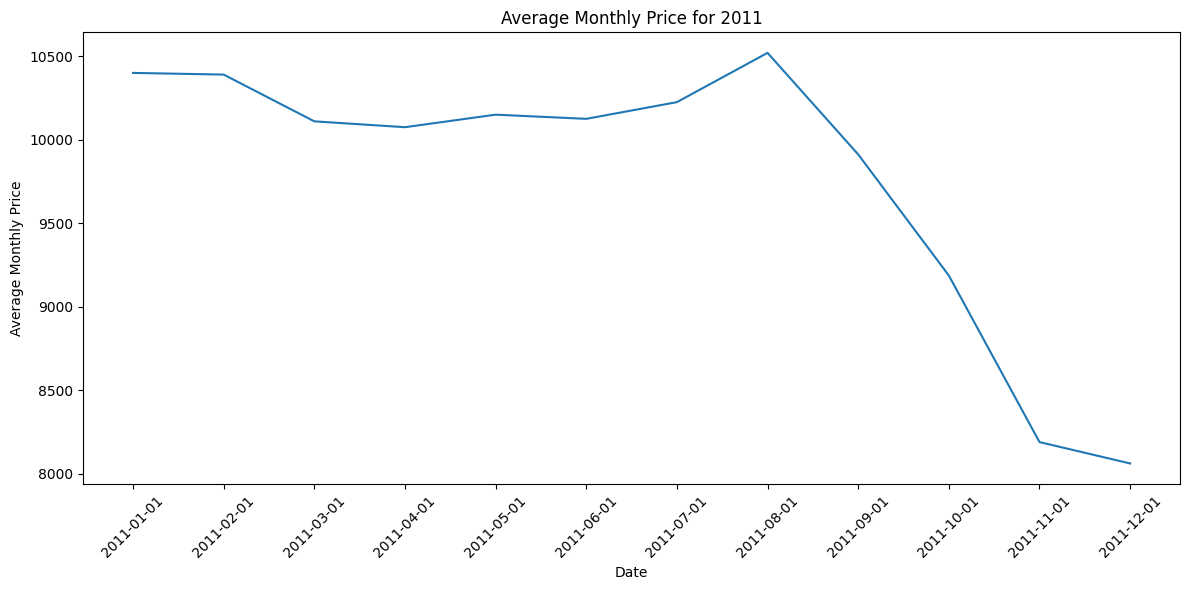

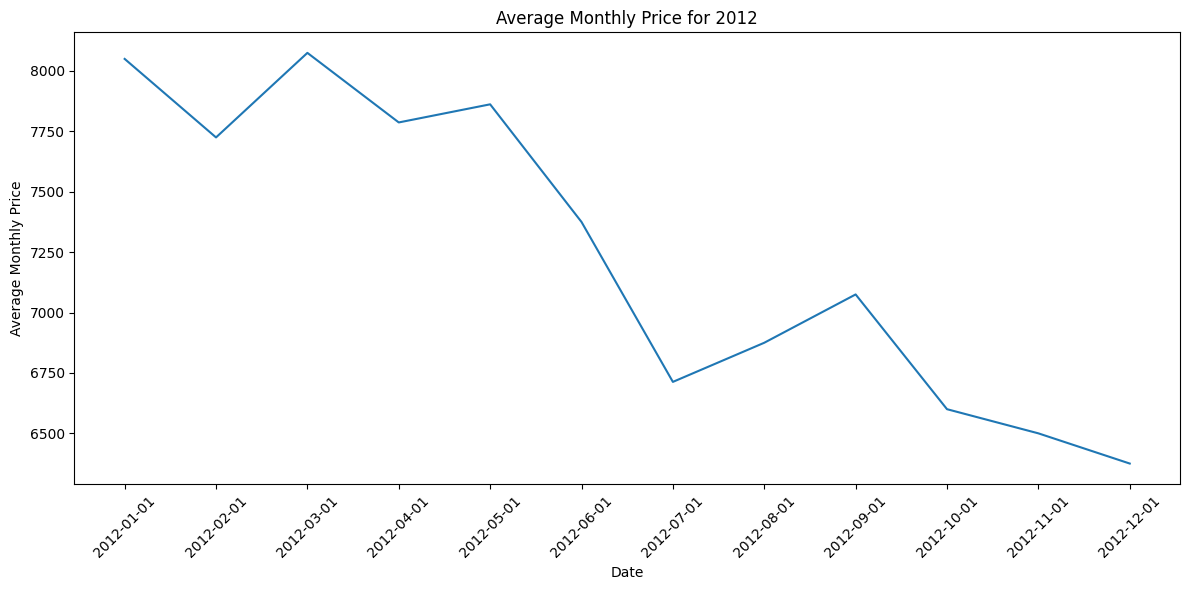

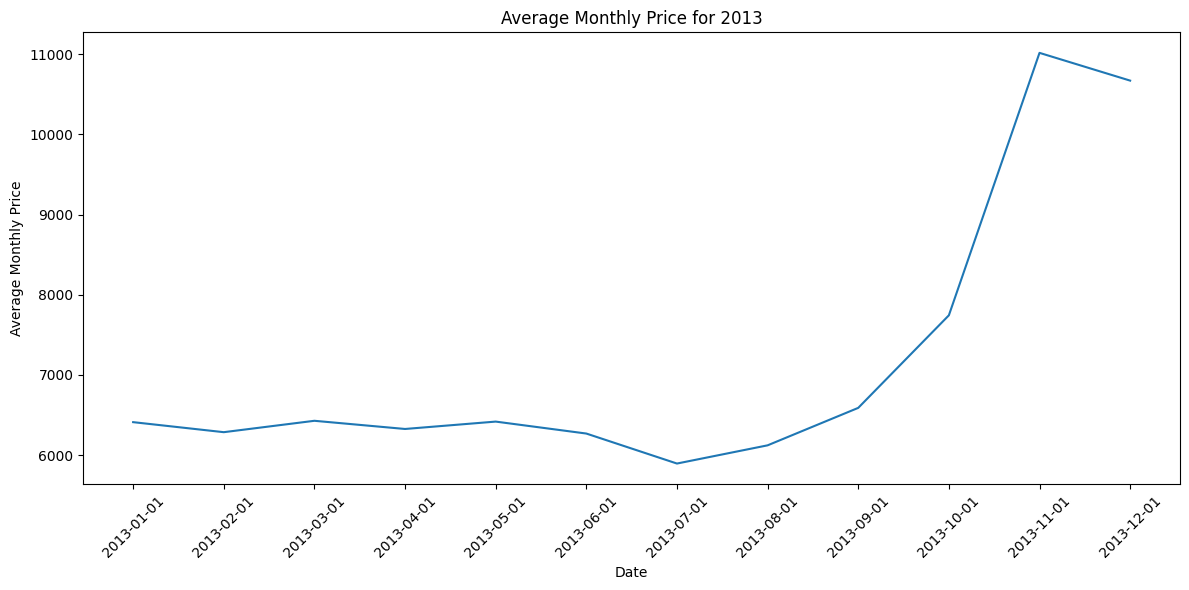

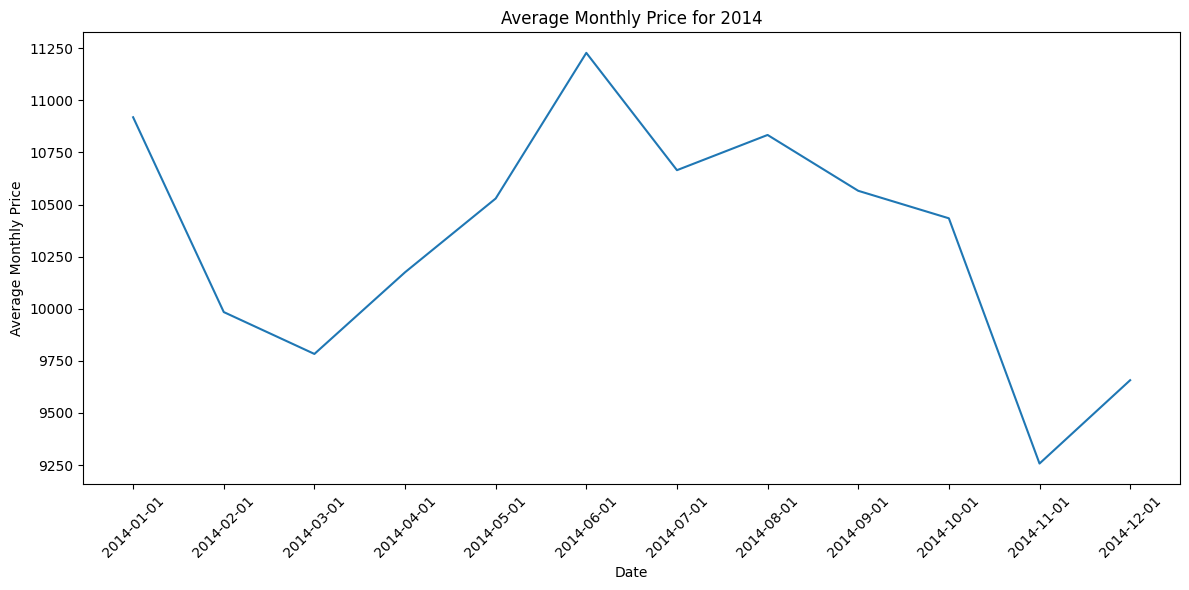

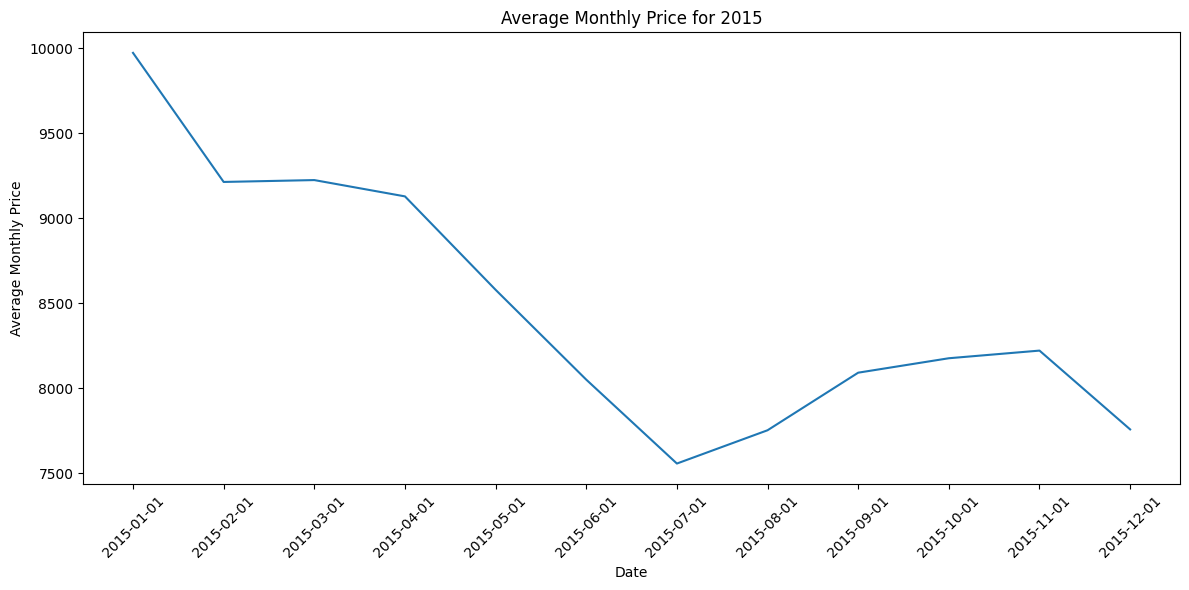

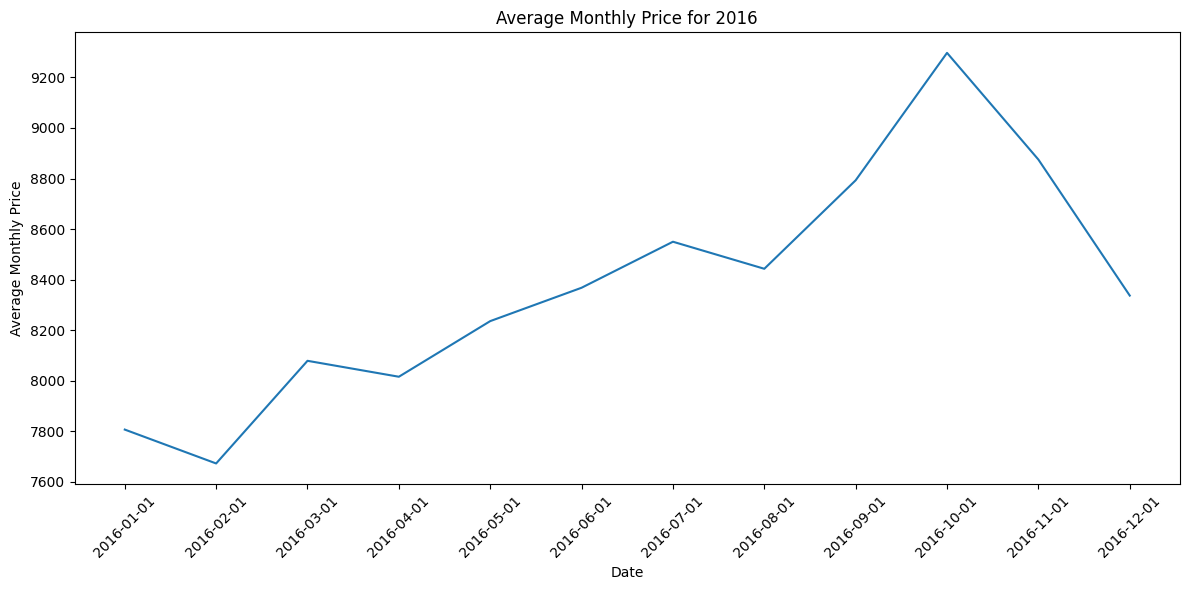

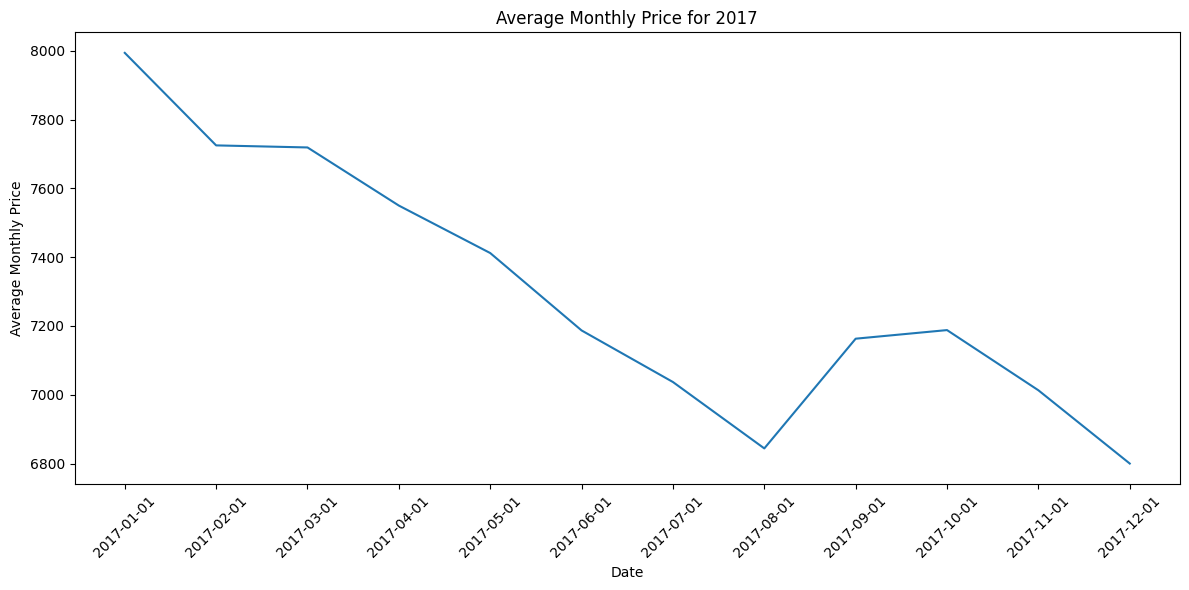

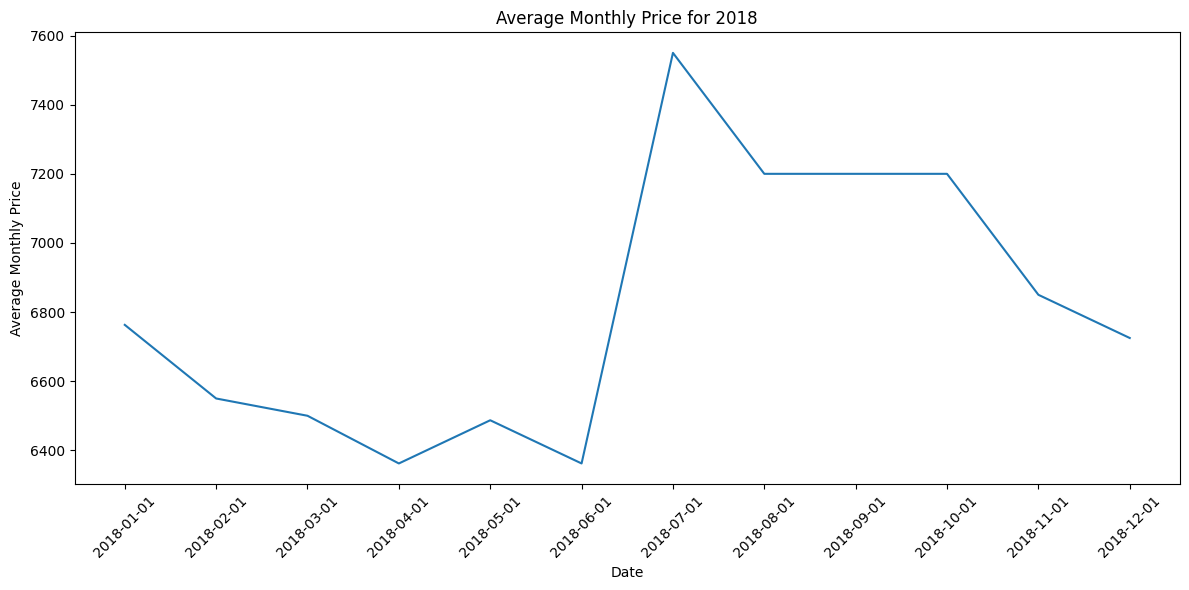

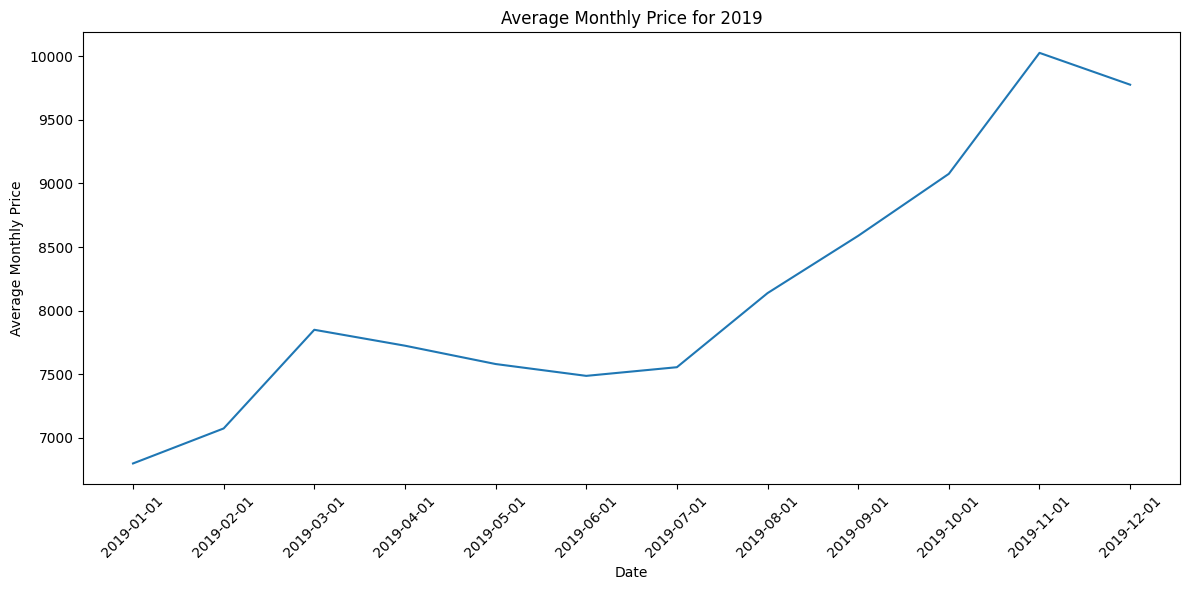

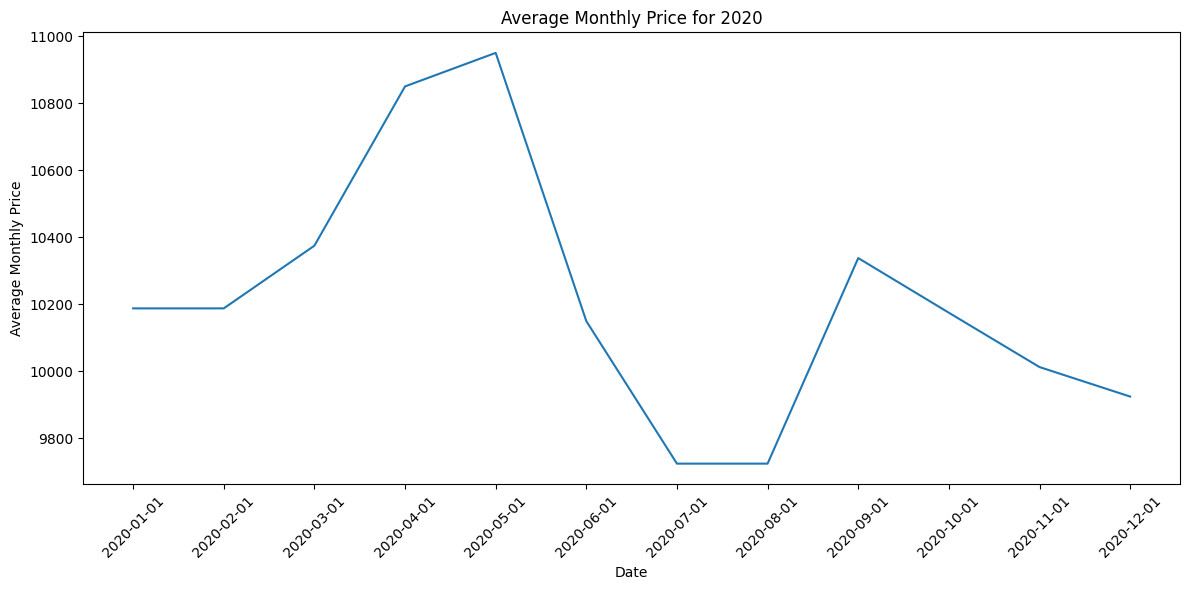

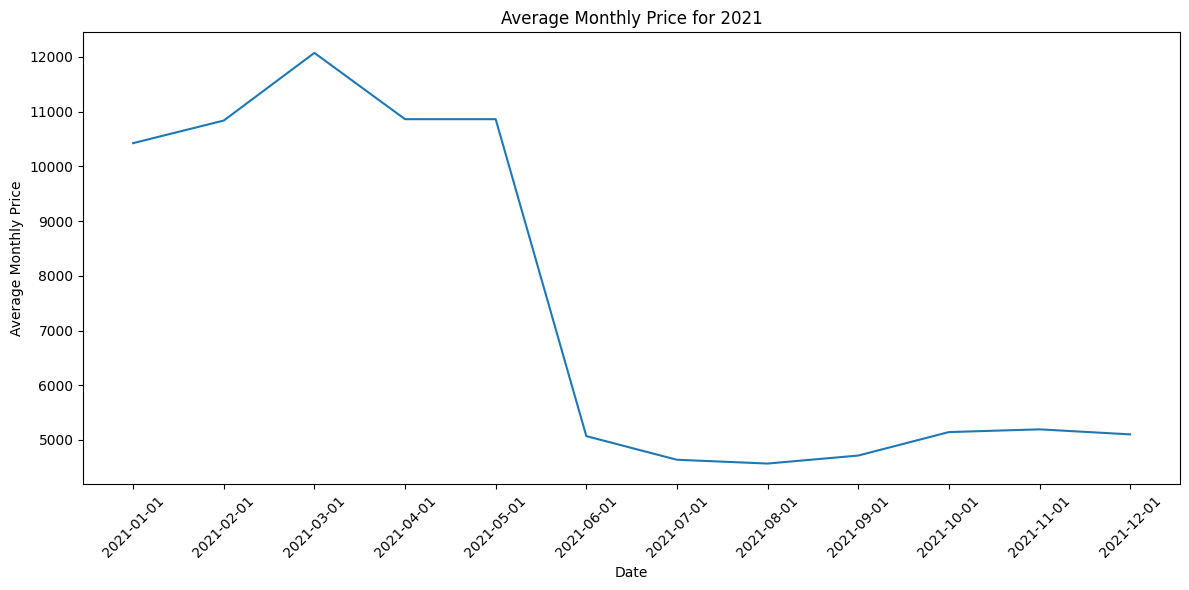

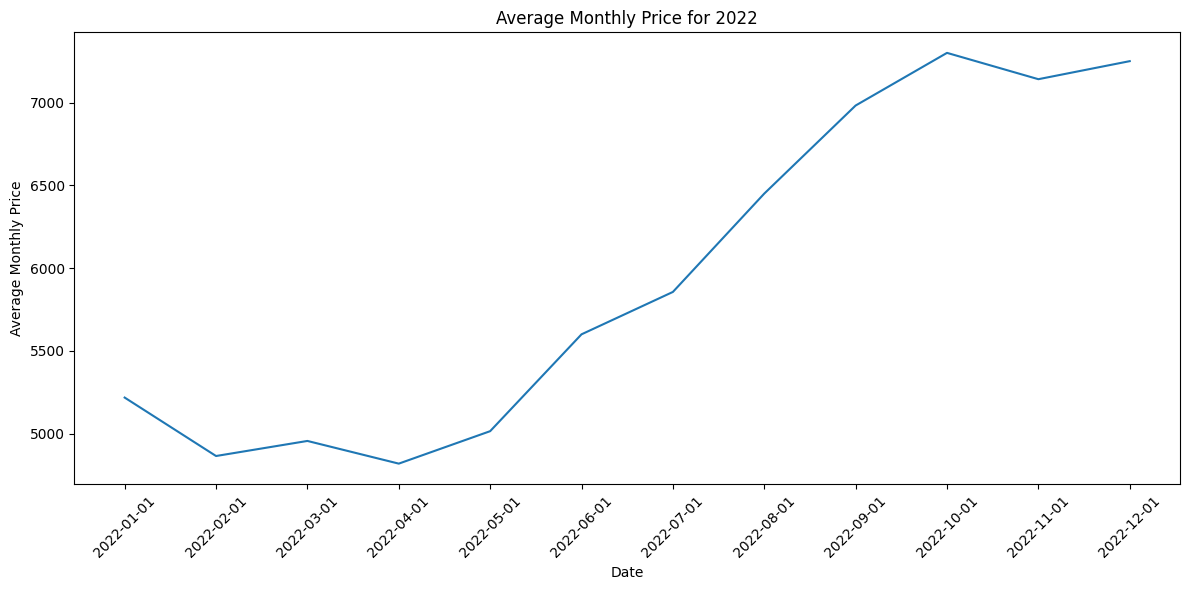

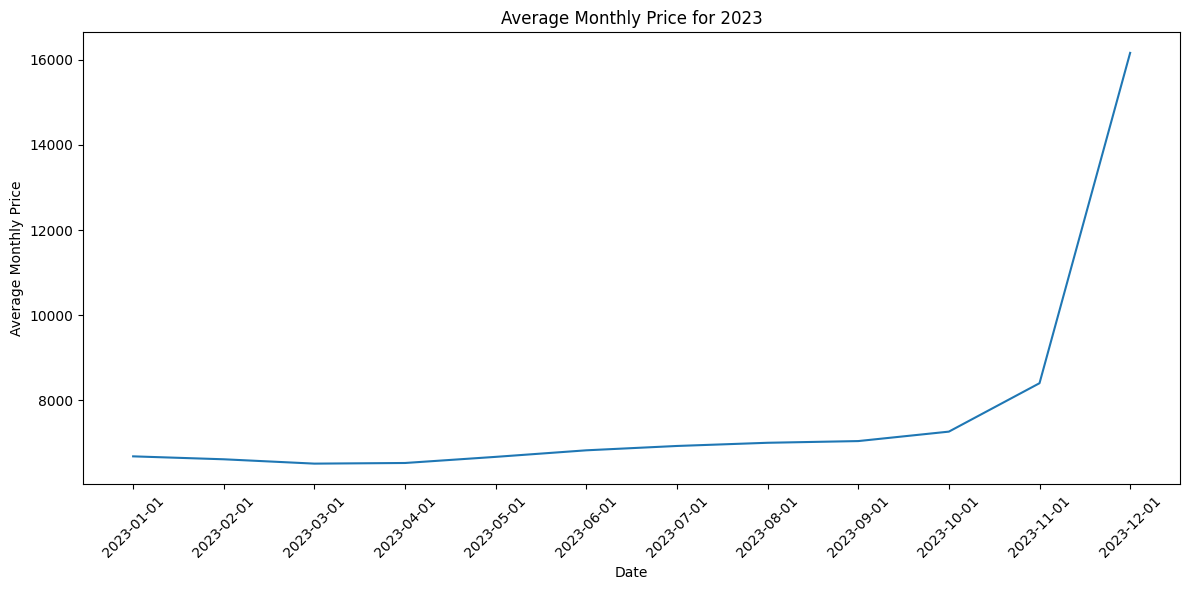

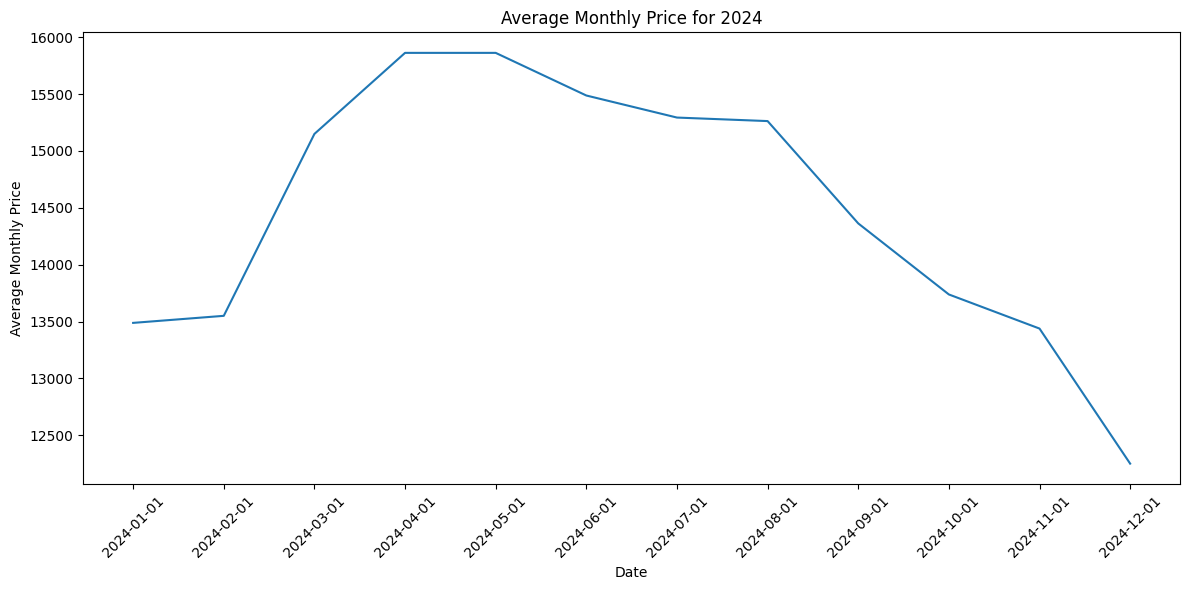

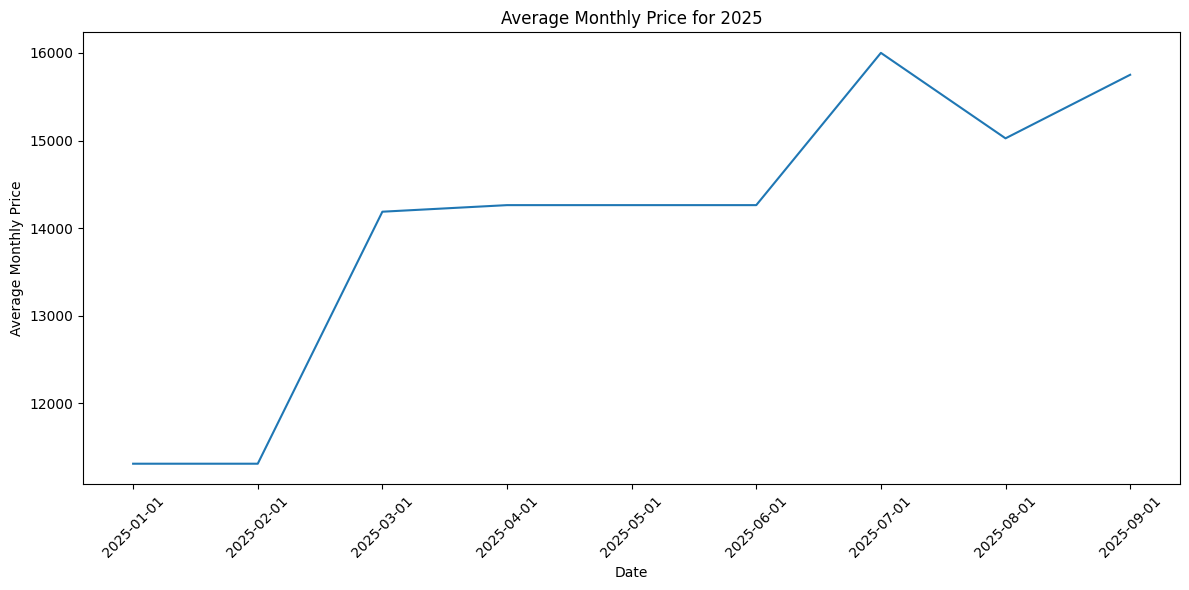

In [ ]:
data['year'] = pd.to_datetime(data['date']).dt.year

unique_years = data['year'].unique()

for year in unique_years:
    plt.figure(figsize=(12, 6))
    yearly_data = data[data['year'] == year]
    sns.lineplot(x=yearly_data['date'], y=yearly_data['avg_monthly_price'])
    plt.title(f'Average Monthly Price for {year}')
    plt.xlabel('Date')
    plt.ylabel('Average Monthly Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

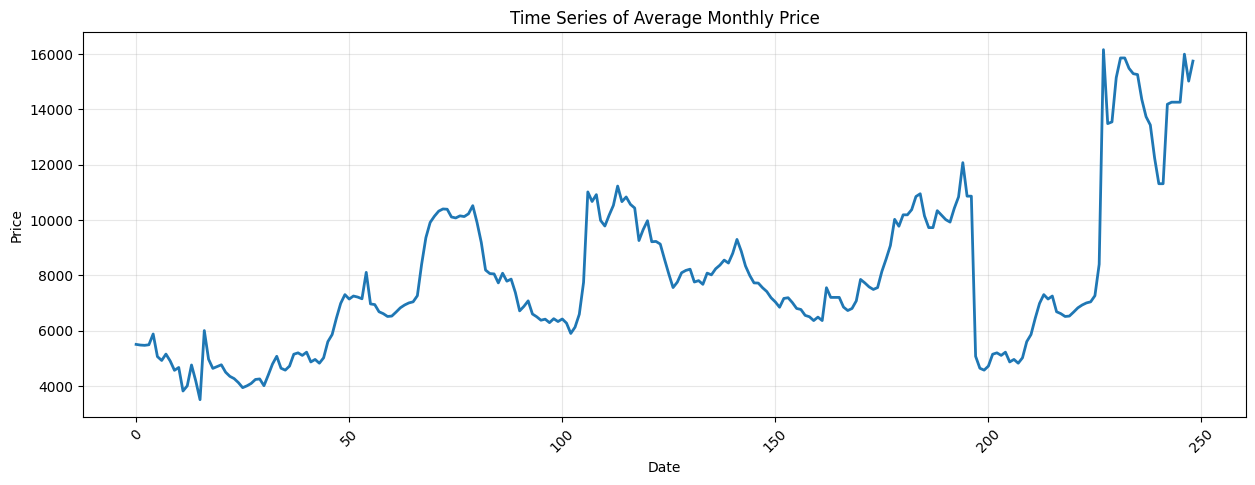

In [ ]:
# Plot the original time series
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['avg_monthly_price'], linewidth=2)
plt.title('Time Series of Average Monthly Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Checking Outliers

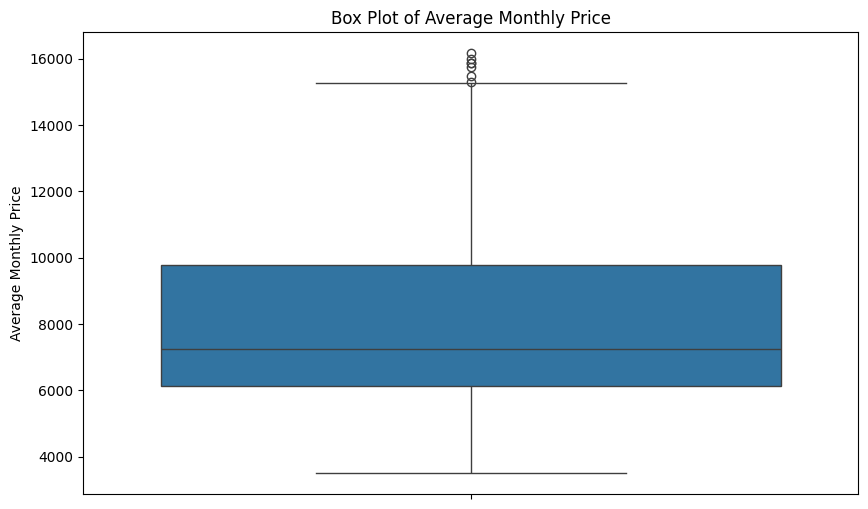

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['avg_monthly_price'])
plt.title('Box Plot of Average Monthly Price')
plt.ylabel('Average Monthly Price')
plt.show()

In [ ]:
# Convert date and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [ ]:
# Detect outliers using IQR method
Q1 = data['avg_monthly_price'].quantile(0.25)
Q3 = data['avg_monthly_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n=== OUTLIER DETECTION (IQR METHOD) ===")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = data[(data['avg_monthly_price'] < lower_bound) | (data['avg_monthly_price'] > upper_bound)]
print(f"\nNumber of outliers identified: {len(outliers)}")
print(f"Percentage of data that are outliers: {(len(outliers)/len(data))*100:.2f}%")

print("\n OUTLIER DETAILS")
outliers_sorted = outliers.sort_values('avg_monthly_price', ascending=False)
display(outliers_sorted)


=== OUTLIER DETECTION (IQR METHOD) ===
Q1 (25th percentile): 6123.00
Q3 (75th percentile): 9783.00
IQR: 3660.00
Lower bound: 633.00
Upper bound: 15273.00

Number of outliers identified: 7
Percentage of data that are outliers: 2.81%

 OUTLIER DETAILS


,avg_monthly_price,year,month
date,,,
2023-12-01,16163,2023,12
2025-07-01,16000,2025,7
2024-04-01,15863,2024,4
2024-05-01,15863,2024,5
2025-09-01,15750,2025,9
2024-06-01,15488,2024,6
2024-07-01,15294,2024,7


In [ ]:
#Dropped outliers
data = data.drop(outliers.index)

In [ ]:
# Detect anomalies using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data['avg_monthly_price']))
anomaly_threshold = 3
anomalies = data[z_scores > anomaly_threshold]

print(f"\nANOMALY DETECTION (Z-SCORE > 3)")
print(f"Number of anomalies: {len(anomalies)}")
if len(anomalies) > 0:
    display(anomalies.sort_values('avg_monthly_price', ascending=False))


ANOMALY DETECTION (Z-SCORE > 3)
Number of anomalies: 1


,avg_monthly_price,year,month
date,,,
2024-08-01,15263,2024,8


In [ ]:
#Dropped anomalies
data = data.drop(anomalies.index)

In [ ]:
# Check for data quality issues

# Check for duplicate dates
duplicate_dates = data.index.duplicated().sum()
print(f"Duplicate dates: {duplicate_dates}")

# Check for zero or negative prices
zero_or_negative = (data['avg_monthly_price'] <= 0).sum()
print(f"Zero or negative prices: {zero_or_negative}")

# Check for sudden price changes (potential data errors)
data['price_change'] = data['avg_monthly_price'].pct_change()
large_changes = data[np.abs(data['price_change']) > 1]  # Changes > 100%
print(f"\nLarge price changes (>100%): {len(large_changes)}")
if len(large_changes) > 0:
    print("Dates with large price changes:")
    display(large_changes[['avg_monthly_price', 'price_change']])

Duplicate dates: 0
Zero or negative prices: 0

Large price changes (>100%): 0


In [ ]:
## Data Quality Issues Found:
# Suspicious Pattern in 2021: There's a sudden drop from ~12,000 to ~5,000 in mid-2021, then a rapid increase back to previous levels
# Recent High Values: 2023-2025 shows very high prices (up to 16,163) that are flagged as outliers
# Potential Data Duplication: Some patterns in 2021-2022 resemble earlier years (2008-2009)

In [ ]:
data.head()

,avg_monthly_price,year,month,price_change
date,,,,
2005-01-01,5500,2005,1,NaN
2005-02-01,5476,2005,2,-0.004364
2005-03-01,5466,2005,3,-0.001826
2005-04-01,5487,2005,4,0.003842
2005-05-01,5876,2005,5,0.070895


In [ ]:
# Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print(f"Data shape: {data.shape}")
print(f"Date range: {data.index.min()} to {data.index.max()}")

Data shape: (241, 4)
Date range: 2005-01-01 00:00:00 to 2025-08-01 00:00:00


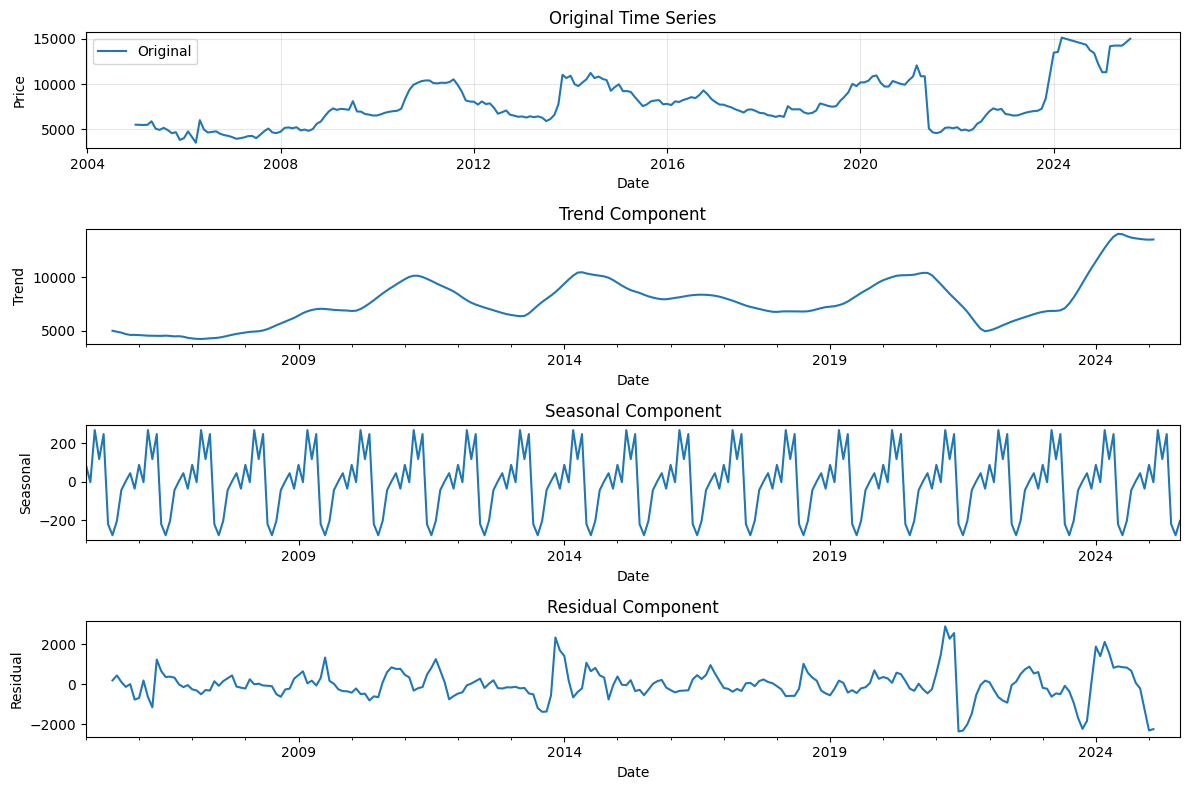

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data.index = pd.to_datetime(data.index)
data_resampled = data['avg_monthly_price'].asfreq('MS')
data_resampled = data_resampled.interpolate(method='time')
decomposition = seasonal_decompose(data_resampled, model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data_resampled.index, data_resampled.values, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)


plt.subplot(4, 1, 2)
decomposition.trend.plot(title='Trend Component', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Trend')


plt.subplot(4, 1, 3)
decomposition.seasonal.plot(title='Seasonal Component', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Seasonal')


plt.subplot(4, 1, 4)
decomposition.resid.plot(title='Residual Component', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

## Model selection

### Time series forecasting to predict future values based on historical patterns.

## We use ARIMA,SARIMAX,Prophet models to forecast future prices by leveraging their ability to capture trends, seasonality, and patterns in the historical time series data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit
import pickle
from math import sqrt

In [ ]:
# Load and preparing data for Model Training
df = data
print(" DATASET OVERVIEW:")
print(f"Total samples: {len(df)}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print()

 DATASET OVERVIEW:
Total samples: 241
Date range: 2005-01-01 00:00:00 to 2025-08-01 00:00:00



In [ ]:
# MULTIPLE MODEL SELECTION

In [ ]:
print(" MULTIPLE MODEL SELECTION")
print("=" * 50)
models_to_train = {
    'ARIMA': 'AutoRegressive Integrated Moving Average',
    'SARIMA': 'Seasonal ARIMA',
    'Prophet': 'Facebook Prophet'
}

for name, desc in models_to_train.items():
    print(f" {name}: {desc}")
print()


 MULTIPLE MODEL SELECTION
 ARIMA: AutoRegressive Integrated Moving Average
 SARIMA: Seasonal ARIMA
 Prophet: Facebook Prophet



In [ ]:
# DATA SPLITTING

print(" DATA SPLITTING FOR TRAINING & TESTING")
print("=" * 50)
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.2)

train = df[:train_size]
test = df[train_size:train_size + test_size]
unknown = df[train_size + test_size:]

print(f"Train set: {len(train)} samples ({train.index.min()} to {train.index.max()})")
print(f"Test set: {len(test)} samples ({test.index.min()} to {test.index.max()})")
print(f"Unknown set: {len(unknown)} samples ({unknown.index.min()} to {unknown.index.max()})")
print()


 DATA SPLITTING FOR TRAINING & TESTING
Train set: 168 samples (2005-01-01 00:00:00 to 2018-12-01 00:00:00)
Test set: 48 samples (2019-01-01 00:00:00 to 2022-12-01 00:00:00)
Unknown set: 25 samples (2023-01-01 00:00:00 to 2025-08-01 00:00:00)



In [ ]:
# MODEL TRAINING FUNCTIONS
def evaluate_model(true, pred, name):
    mae = mean_absolute_error(true, pred)
    rmse = sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

def train_arima(train_data, test_data):
    model = ARIMA(train_data['avg_monthly_price'], order=(2,1,2))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(test_data))
    return forecast, fitted_model

def train_sarima(train_data, test_data):
    model = SARIMAX(train_data['avg_monthly_price'], order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit(disp=False)
    forecast = fitted_model.forecast(steps=len(test_data))
    return forecast, fitted_model

def train_prophet(train_data, test_data):
    prophet_df = train_data.reset_index().rename(columns={'date':'ds', 'avg_monthly_price':'y'})
    model = Prophet(yearly_seasonality=True)
    model.fit(prophet_df)

    future = test_data.reset_index().rename(columns={'date':'ds'})
    forecast_df = model.predict(future)
    return forecast_df['yhat'].values, model

In [ ]:
# MODEL TRAINING & TESTING
print(" MODEL TRAINING & TESTING ON KNOWN DATA")
print("=" * 50)

test_results = []
trained_models = {}

# Train and test each model
for model_name in models_to_train.keys():
    print(f" Training {model_name}...")

    if model_name == "ARIMA":
        forecast, model = train_arima(train, test)
    elif model_name == "SARIMA":
        forecast, model = train_sarima(train, test)
    elif model_name == "Prophet":
        forecast, model = train_prophet(train, test)

    # Evaluate on test data
    metrics = evaluate_model(test['avg_monthly_price'], forecast, model_name)
    test_results.append(metrics)
    trained_models[model_name] = model

    print(f"  {model_name} trained - Test MAE: {metrics['MAE']:.0f}")

print("\n TEST SET PERFORMANCE SUMMARY:")
print("-" * 50)
test_df = pd.DataFrame(test_results).sort_values('MAE')
for _, row in test_df.iterrows():
    print(f"{row['Model']:8} -> MAE: {row['MAE']:.0f}, RMSE: {row['RMSE']:.0f}, MAPE: {row['MAPE']:.1f}%")
print()

 MODEL TRAINING & TESTING ON KNOWN DATA
 Training ARIMA...
  ARIMA trained - Test MAE: 2190
 Training SARIMA...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/t6o3fk_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/bzokq15k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55245', 'data', 'file=/tmp/tmppdri7lk7/t6o3fk_p.json', 'init=/tmp/tmppdri7lk7/bzokq15k.json', 'output', 'file=/tmp/tmppdri7lk7/prophet_modeljotzs7ck/prophet_model-20251016162031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  SARIMA trained - Test MAE: 2213
 Training Prophet...
  Prophet trained - Test MAE: 2006

 TEST SET PERFORMANCE SUMMARY:
--------------------------------------------------
Prophet  -> MAE: 2006, RMSE: 2386, MAPE: 24.6%
ARIMA    -> MAE: 2190, RMSE: 2560, MAPE: 27.0%
SARIMA   -> MAE: 2213, RMSE: 2498, MAPE: 28.8%



In [ ]:
# CROSS-VALIDATION & MODEL EVALUATION

print(" CROSS-VALIDATION & MODEL EVALUATION")
print("=" * 50)

def cross_validate_model(model_func, data, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mae_scores = []

    for train_idx, val_idx in tscv.split(data):
        train_cv = data.iloc[train_idx]
        val_cv = data.iloc[val_idx]

        try:
            forecast = model_func(train_cv, val_cv)[0]
            mae = mean_absolute_error(val_cv['avg_monthly_price'], forecast)
            mae_scores.append(mae)
        except Exception as e:
            continue

    return np.mean(mae_scores) if mae_scores else np.inf

print(" Performing Cross-Validation...")
cv_results = {}
for model_name in models_to_train.keys():
    if model_name == "ARIMA":
        cv_score = cross_validate_model(train_arima, train)
    elif model_name == "SARIMA":
        cv_score = cross_validate_model(train_sarima, train)
    elif model_name == "Prophet":
        cv_score = cross_validate_model(train_prophet, train)

    cv_results[model_name] = cv_score
    print(f"   {model_name:8} -> CV Average MAE: {cv_score:.0f}")

print()

 CROSS-VALIDATION & MODEL EVALUATION
 Performing Cross-Validation...
   ARIMA    -> CV Average MAE: 1509


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/mbe19juj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/6t1skc1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4381', 'data', 'file=/tmp/tmppdri7lk7/mbe19juj.json', 'init=/tmp/tmppdri7lk7/6t1skc1g.json', 'output', 'file=/tmp/tmppdri7lk7/prophet_modelk863lwwi/prophet_model-20251016162039.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:20:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


   SARIMA   -> CV Average MAE: 1705


16:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/v1vx83pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/0b3qtk_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25292', 'data', 'file=/tmp/tmppdri7lk7/v1vx83pu.json', 'init=/tmp/tmppdri7lk7/0b3qtk_i.json', 'output', 'file=/tmp/tmppdri7lk7/prophet_modelyh66clnn/prophet_model-20251016162039.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:20:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:40 - cmdstanpy - INFO - Chain [1]

   Prophet  -> CV Average MAE: 2091



In [ ]:
# VALIDATION ON UNKNOWN DATA
print(" VALIDATION ON UNKNOWN DATA")
print("=" * 50)

unknown_results = []
final_models = {}

print("Testing models on completely unknown data...")
for model_name in models_to_train.keys():
    # Train on combined train + test data
    full_train = pd.concat([train, test])

    if model_name == "ARIMA":
        final_model = ARIMA(full_train['avg_monthly_price'], order=(2,1,2)).fit()
        forecast = final_model.forecast(steps=len(unknown))
    elif model_name == "SARIMA":
        final_model = SARIMAX(full_train['avg_monthly_price'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
        forecast = final_model.forecast(steps=len(unknown))
    elif model_name == "Prophet":
        prophet_full = full_train.reset_index().rename(columns={'date':'ds', 'avg_monthly_price':'y'})
        final_model = Prophet(yearly_seasonality=True)
        final_model.fit(prophet_full)
        future = unknown.reset_index().rename(columns={'date':'ds'})
        forecast_df = final_model.predict(future)
        forecast = forecast_df['yhat'].values

    metrics = evaluate_model(unknown['avg_monthly_price'], forecast, model_name)
    unknown_results.append(metrics)
    final_models[model_name] = final_model

    print(f"   {model_name:8} -> Unknown MAE: {metrics['MAE']:.0f}")

print("\n UNKNOWN DATA PERFORMANCE:")
print("-" * 50)
unknown_df = pd.DataFrame(unknown_results).sort_values('MAE')
for _, row in unknown_df.iterrows():
    print(f"{row['Model']:8} -> MAE: {row['MAE']:.0f}, RMSE: {row['RMSE']:.0f}, MAPE: {row['MAPE']:.1f}%")
print()

 VALIDATION ON UNKNOWN DATA
Testing models on completely unknown data...
   ARIMA    -> Unknown MAE: 3783


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/386dizj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdri7lk7/o4dmhzh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69413', 'data', 'file=/tmp/tmppdri7lk7/386dizj_.json', 'init=/tmp/tmppdri7lk7/o4dmhzh6.json', 'output', 'file=/tmp/tmppdri7lk7/prophet_modelm44p_ry7/prophet_model-20251016162042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   SARIMA   -> Unknown MAE: 3823
   Prophet  -> Unknown MAE: 3803

 UNKNOWN DATA PERFORMANCE:
--------------------------------------------------
ARIMA    -> MAE: 3783, RMSE: 4836, MAPE: 23.6%
Prophet  -> MAE: 3803, RMSE: 4789, MAPE: 29.9%
SARIMA   -> MAE: 3823, RMSE: 4867, MAPE: 23.6%



In [ ]:
# FINDING BEST MODEL
print(" FINDING BEST MODEL")
print("=" * 50)

# Combine all evaluations
final_evaluation = []
for model_name in models_to_train.keys():
    test_mae = test_df[test_df['Model'] == model_name]['MAE'].values[0]
    cv_mae = cv_results[model_name]
    unknown_mae = unknown_df[unknown_df['Model'] == model_name]['MAE'].values[0]

    # Overall score (weighted average)
    overall_score = (test_mae * 0.3) + (cv_mae * 0.3) + (unknown_mae * 0.4)

    final_evaluation.append({
        'Model': model_name,
        'Test_MAE': test_mae,
        'CV_MAE': cv_mae,
        'Unknown_MAE': unknown_mae,
        'Overall_Score': overall_score
    })

final_df = pd.DataFrame(final_evaluation).sort_values('Overall_Score')
best_model_name = final_df.iloc[0]['Model']
best_model = final_models[best_model_name]

print(" FINAL MODEL RANKINGS:")
print("-" * 50)
for _, row in final_df.iterrows():
    print(f"{row['Model']:8} -> Test: {row['Test_MAE']:.0f}, CV: {row['CV_MAE']:.0f}, Unknown: {row['Unknown_MAE']:.0f}, Overall: {row['Overall_Score']:.0f}")

print(f"\n BEST MODEL: {best_model_name}")
print(f"Overall Score: {final_df.iloc[0]['Overall_Score']:.0f}")
print()

 FINDING BEST MODEL
 FINAL MODEL RANKINGS:
--------------------------------------------------
ARIMA    -> Test: 2190, CV: 1509, Unknown: 3783, Overall: 2623
SARIMA   -> Test: 2213, CV: 1705, Unknown: 3823, Overall: 2705
Prophet  -> Test: 2006, CV: 2091, Unknown: 3803, Overall: 2750

 BEST MODEL: ARIMA
Overall Score: 2623



**Observation**:
BEST MODEL: ARIMA


In [ ]:
# After Finding Best Model on Unknow Data which Performing Well

In [ ]:
# PICKLE FILE CREATION
print(" PICKLE FILE CREATION")
print("=" * 50)

filename = f'best_{best_model_name.lower()}_model.pkl'
print(f" Saving {best_model_name} as '{filename}'...")

with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

print(" Model saved successfully!")
print(f" File: {filename}")
print()

 PICKLE FILE CREATION
 Saving ARIMA as 'best_arima_model.pkl'...
 Model saved successfully!
 File: best_arima_model.pkl

